In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

##**Importing Dataset**

In [5]:
#create a dataframe
df = pd.read_csv("ai4i2020.csv")

In [6]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [7]:
num = list(df.columns[3:8])
cat = [df.columns[2]]
label_binary = [df.columns[8]]
label_multi = list(df.columns[9:])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## **Check Missing Value** ##

In [9]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

there are no missing values

##**Check Duplicated Data**##

In [10]:
df[df.duplicated(keep=False)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF


In [11]:
df.duplicated().sum()

0

There are no duplicated data

##**Check Entry Errors**##

In [12]:
df_failures = df.loc[df[label_binary[0]] == 1]
df_failures[(df_failures[label_multi] == 0).all(axis=1)][label_binary + label_multi]

,Machine failure,TWF,HDF,PWF,OSF,RNF
1437,1,0,0,0,0,0
2749,1,0,0,0,0,0
4044,1,0,0,0,0,0
4684,1,0,0,0,0,0
5536,1,0,0,0,0,0
5941,1,0,0,0,0,0
6478,1,0,0,0,0,0
8506,1,0,0,0,0,0
9015,1,0,0,0,0,0


In [13]:
df.drop(df_failures[(df_failures[label_multi] == 0).all(axis=1)][label_binary + label_multi].index, inplace = True)

In [14]:
df_nonfailures = df.loc[df[label_binary[0]] == 0]
df_nonfailures[(df_nonfailures[label_multi] != 0).any(axis=1)][label_binary + label_multi]

,Machine failure,TWF,HDF,PWF,OSF,RNF
1221,0,0,0,0,0,1
1302,0,0,0,0,0,1
1748,0,0,0,0,0,1
2072,0,0,0,0,0,1
2559,0,0,0,0,0,1
3065,0,0,0,0,0,1
3452,0,0,0,0,0,1
5471,0,0,0,0,0,1
5489,0,0,0,0,0,1
5495,0,0,0,0,0,1


In [15]:
nonfailures_index = df_nonfailures[(df_nonfailures[label_multi] != 0).any(axis=1)][label_binary].index
df.loc[nonfailures_index, label_binary] = df.loc[nonfailures_index, label_binary].replace(0, 1, inplace = False)

In [16]:
df.reset_index(drop = True, inplace = True)

##**Check Outliers**##

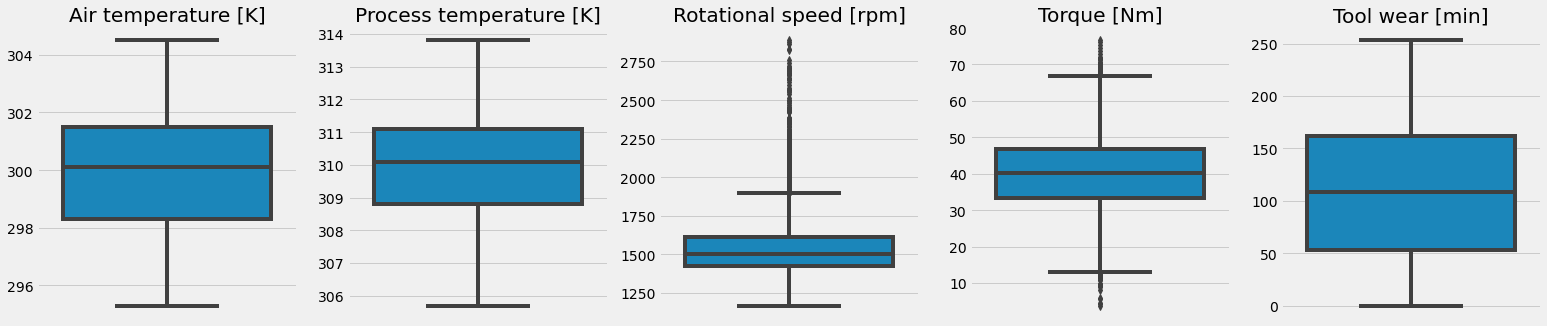

In [17]:
#outliers
plt.figure(figsize=(24,5))
for idx, feature in enumerate(num):
  plt.subplot(1,len(num),idx+1)
  sns.boxplot(data = df, y = feature).set(ylabel = None, title = feature)

##**Descriptive Statistics**

In [18]:
df_mean = pd.DataFrame()
for i in label_multi:
  class_mean = pd.DataFrame(round(df[df[i] == 1][num].mean(), 2)).T
  df_mean = pd.concat([df_mean,class_mean])
df_mean.index = label_multi

df_mean

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
TWF,300.30,310.17,1566.17,37.84,216.37
HDF,302.56,310.79,1337.26,53.17,107.19
PWF,300.08,309.95,1763.97,48.51,101.88
OSF,300.04,310.07,1350.33,58.37,207.69
RNF,300.82,310.76,1485.00,43.67,124.47


In [20]:
# Assuming df contains your DataFrame
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# If you want to slice the correlation matrix for specific rows and columns:
# Here, 7: represents the rows from the 7th index (inclusive) to the end, and 1:6 represents columns from the 1st index (inclusive) to the 5th index (exclusive).
subset_correlation_matrix = correlation_matrix.iloc[7:, 1:6]

##**Distribution**##

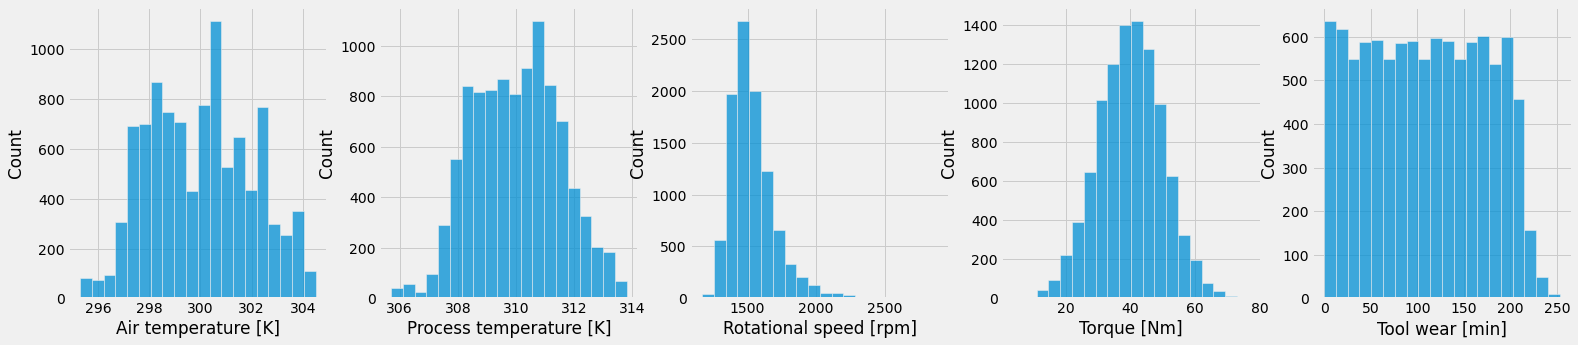

In [21]:
#dist: histogram
plt.figure(figsize=(24,5))
for idx, feature in enumerate(num):
  plt.subplot(1,len(num),idx+1)
  sns.histplot(data = df, x = feature, stat = 'count', bins = 20)

In [22]:
df[cat].value_counts().index

MultiIndex([('L',),
            ('M',),
            ('H',)],
           names=['Type'])

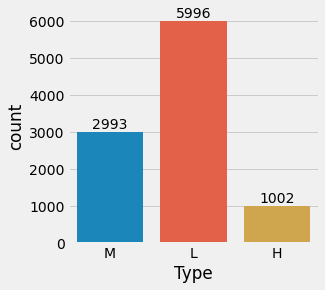

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
f = sns.countplot(data=df, x=cat[0])

# Adding labels to the bars
for p in f.patches:
    height = p.get_height()
    f.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
               ha='center', va='bottom')

plt.show()

In [25]:
df[df['Machine failure']==1][label_multi].value_counts()

TWF  HDF  PWF  OSF  RNF
0    1    0    0    0      106
     0    1    0    0       80
          0    1    0       78
1    0    0    0    0       42
0    0    0    0    1       18
          1    1    0       11
     1    0    1    0        6
          1    0    0        3
1    0    0    1    0        2
               0    1        1
          1    1    0        1
dtype: int64

## **Correlation plot**

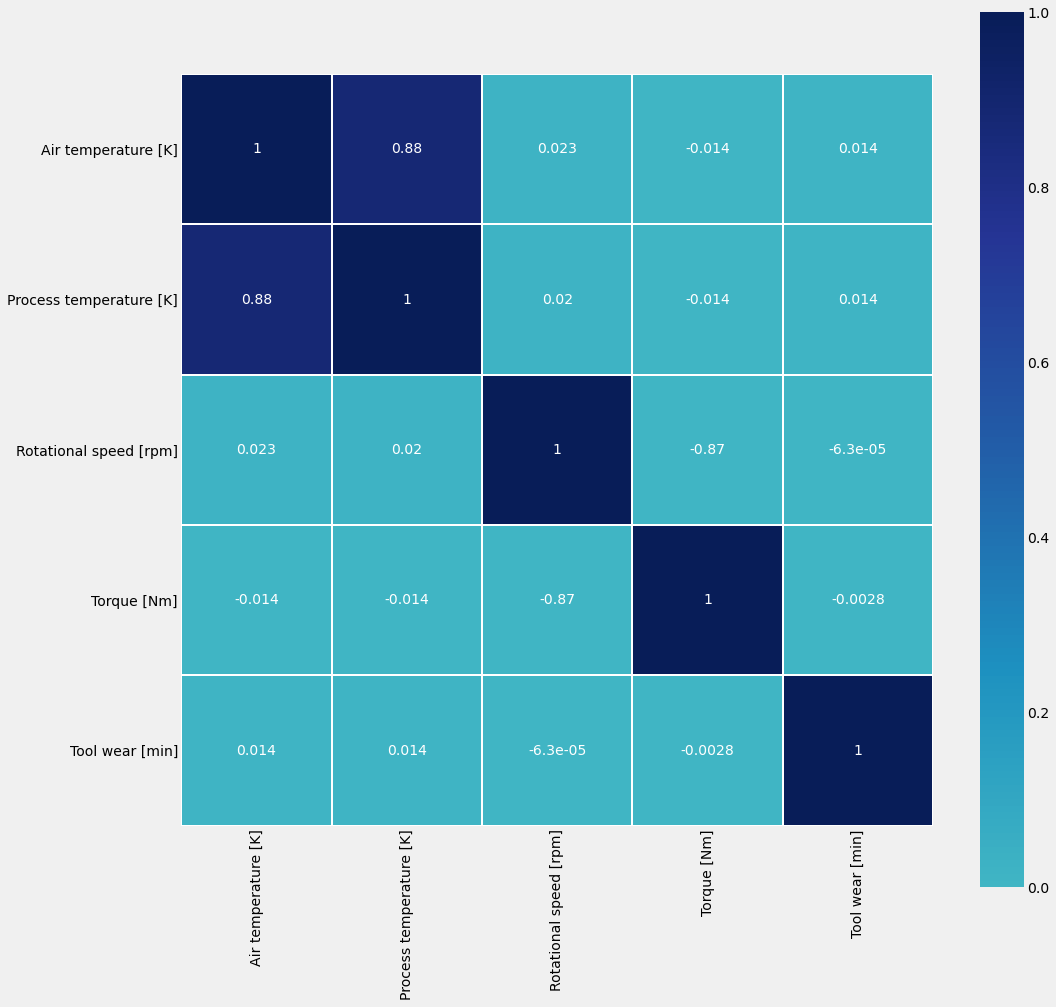

In [26]:
correlation = df[num].corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmin=0, vmax=1, center=0, annot=True,
                 cmap="YlGnBu", linewidths = 1.0,
                 square=True)
plt.show()

## **Perform label categorical feature encoding**

In [27]:
#test
for i in (('L', 0), ('M', 1), ('H', 2)):
  df.Type =  df.Type.replace(*i)

In [28]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


##**Scaling Data**##

In [29]:
from sklearn.preprocessing import StandardScaler

#create a scaler object
scaler = StandardScaler()

#perform scaling on the numeric column
df[num] = scaler.fit_transform(df[num])

In [30]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,1,-0.952222,-0.947078,0.068015,0.282351,-1.695786,0,0,0,0,0,0
1,2,L47181,0,-0.902227,-0.879689,-0.729478,0.633456,-1.648656,0,0,0,0,0,0
2,3,L47182,0,-0.952222,-1.014468,-0.227559,0.944434,-1.617236,0,0,0,0,0,0
3,4,L47183,0,-0.902227,-0.947078,-0.590056,-0.048691,-1.585816,0,0,0,0,0,0
4,5,L47184,0,-0.902227,-0.879689,-0.729478,0.001467,-1.554395,0,0,0,0,0,0


## **Imbalances**

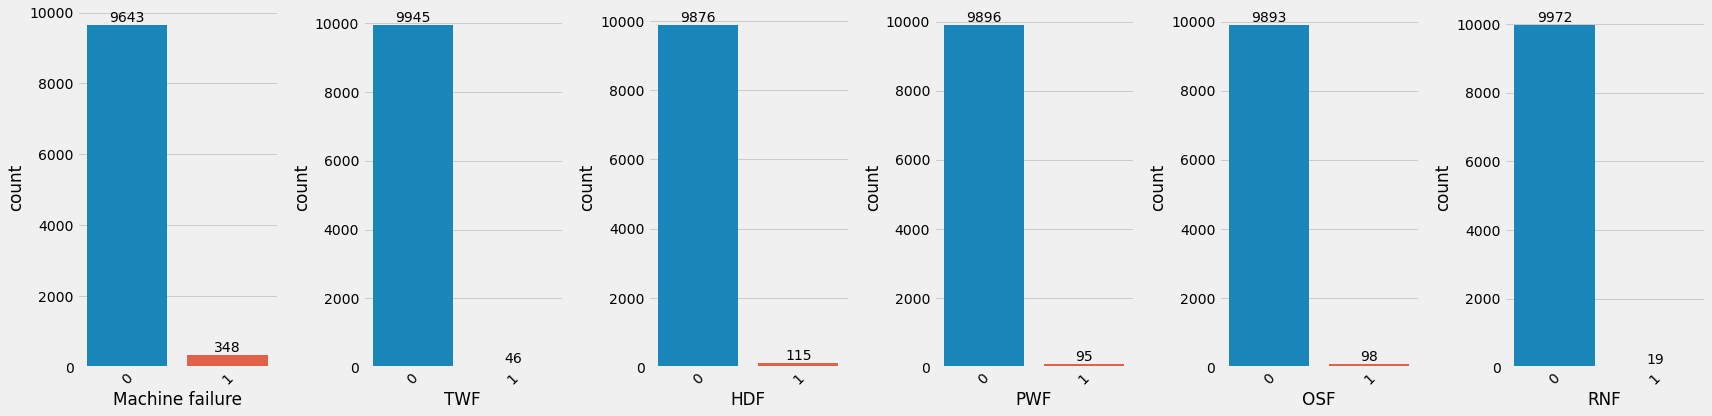

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 6))

for idx, feature in enumerate(label_binary + label_multi):
    plt.subplot(1, 6, idx + 1)
    f = sns.countplot(data=df, x=feature)
    
    # Adding labels to the bars
    for p in f.patches:
        height = p.get_height()
        f.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='bottom')
    
    plt.xticks(rotation=45)  # Set rotation for x-axis labels
    plt.xlabel(feature)
    plt.tight_layout()

plt.show()


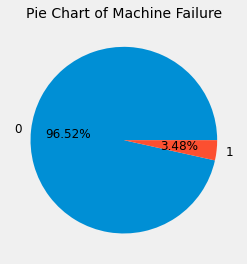

In [33]:
plt.pie(df[label_binary[0]].value_counts(), labels = df[label_binary[0]].value_counts().index,
        autopct='%1.2f%%', textprops={'fontsize': 12})
plt.title('Pie Chart of Machine Failure', fontsize = 14)
plt.show()

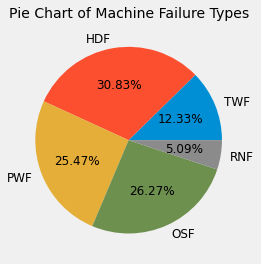

In [34]:
#With RNF
plt.pie(df.loc[df[label_binary[0]] == 1][label_multi].sum(), labels = df.loc[df[label_binary[0]] == 1][label_multi].sum().index,
        autopct='%1.2f%%', textprops={'fontsize': 12})
plt.title('Pie Chart of Machine Failure Types', fontsize = 14)
plt.show()

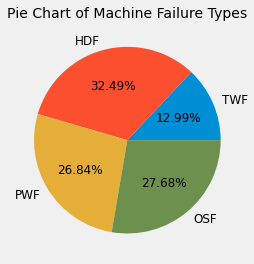

In [35]:
#without RNF
plt.pie(df.loc[df[label_binary[0]] == 1][label_multi[:4]].sum(), labels = df.loc[df[label_binary[0]] == 1][label_multi[:4]].sum().index,
        autopct='%1.2f%%', textprops={'fontsize': 12})
plt.title('Pie Chart of Machine Failure Types', fontsize = 14)
plt.show()

## **Binary Classification**

In [36]:
df_clean = df[df.RNF != 1]

In [37]:
X_binary = df_clean[num+cat]
y_binary = df_clean[label_binary]

In [38]:
y_binary.value_counts()

Machine failure
0                  9643
1                   329
dtype: int64

In [43]:
pip install imblearn


  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


In [45]:
from imblearn.over_sampling import SMOTE, SVMSMOTE, RandomOverSampler
oversamp = RandomOverSampler(random_state=0)

ImportError: cannot import name '_OneToOneFeatureMixin' from 'sklearn.base' (C:\Users\kayal\anaconda3\lib\site-packages\sklearn\base.py)

In [40]:
over = SMOTE(random_state=15)

NameError: name 'SMOTE' is not defined

In [36]:
X_binary_over, y_binary_over = over.fit_resample(X_binary, y_binary)

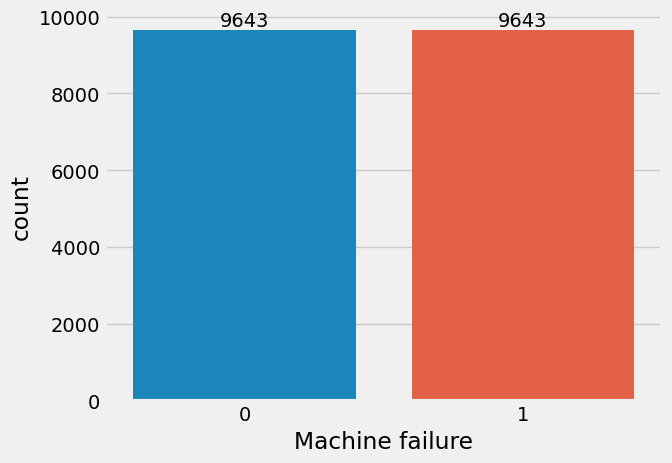

In [37]:
f = sns.countplot(data = y_binary_over, x = label_binary[0])
f.bar_label(f.containers[0])
plt.show()

In [47]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [48]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

ImportError: cannot import name '_fit_context' from 'sklearn.base' (C:\Users\kayal\anaconda3\lib\site-packages\sklearn\base.py)

In [39]:
#Dividing the dataset into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_binary_over, y_binary_over, test_size=0.2, random_state=100)

In [40]:
# define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network MLP': MLPClassifier(),
    'SVM': SVC(probability=True)
}

# define parameters
params = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'lbfgs', 'sag'], 'class_weight': ['balanced', None]},
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15], 'min_samples_split': [5, 10, 15]},
    'Random Forest': {'n_estimators': [10, 20, 30], 'max_depth': [5, 10, 15], 'min_samples_split': [5, 10, 15]},
    'Gradient Boosting': {'learning_rate': [0.1, 1, 10], 'n_estimators': [10, 20, 30], 'max_depth': [5, 10, 15], 'min_samples_split': [5, 10, 15]},
    'Neural Network MLP': {'solver': ['adam', 'lbfgs'], 'alpha': [0.0001, 0.001]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'class_weight': ['balanced', None]}
}

best_models = {}
result = pd.DataFrame(columns = ['Model', 'Score'])

for name, model in models.items():
  search = GridSearchCV(model, params[name], cv = 5)
  search.fit(X_train, y_train)
  best_models.update({name: search.best_estimator_})
  result = result.append({'Model': name, 'Score': search.best_score_},
                           ignore_index = True)

result.sort_values('Score', ascending = False, inplace = True)
result.reset_index(drop = True, inplace = True)
result

,Model,Score
0,Gradient Boosting,0.988398
1,Random Forest,0.982240
2,Neural Network MLP,0.980879
3,Decision Tree,0.977249
4,SVM,0.968564
5,Logistic Regression,0.836595


In [ ]:
best_models[result['Model'][0]]

In [42]:
index = pd.merge(X_binary, X_test, left_index=True, right_index=True).index

In [43]:
X_filtered_test = X_binary.filter(items = index, axis = 0)
X_filtered_test

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
1,-0.902227,-0.879689,-0.729478,0.633456,-1.648656,0
2,-0.952222,-1.014468,-0.227559,0.944434,-1.617236,0
3,-0.902227,-0.947078,-0.590056,-0.048691,-1.585816,0
8,-0.852232,-0.879689,0.714932,-1.142132,-1.413005,1
21,-0.602257,-0.475354,-0.495249,0.482982,-0.706052,0
...,...,...,...,...,...,...
9958,-0.852232,-1.418803,0.391473,-0.760932,0.676434,1
9967,-0.702247,-1.216635,0.926853,-1.372858,1.084895,0
9976,-0.652252,-1.014468,0.185129,-0.439922,1.477647,2
9979,-0.552262,-0.947078,1.294926,-1.593553,1.650458,0


In [44]:
y_filtered_test = y_binary.filter(items = index, axis = 0)
y_filtered_test

,Machine failure
1,0
2,0
3,0
8,0
21,0
...,...
9958,0
9967,0
9976,0
9979,0


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9949    0.9975      1975
           1     0.8684    1.0000    0.9296        66

    accuracy                         0.9951      2041
   macro avg     0.9342    0.9975    0.9635      2041
weighted avg     0.9957    0.9951    0.9953      2041

Confusion Matrix:


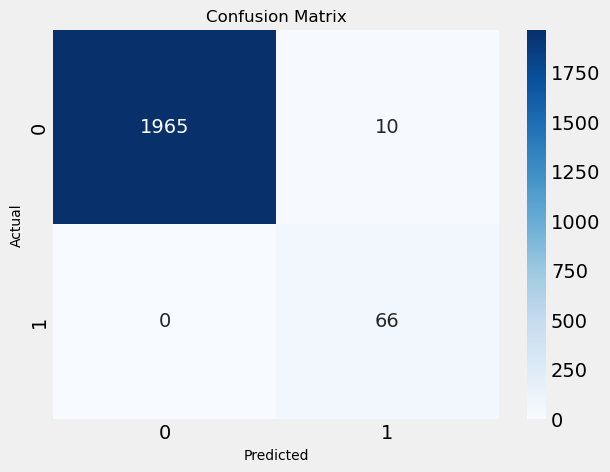

In [45]:
#with filter SMOTE
model = best_models[result['Model'][0]]
#model = SVC(C=10, class_weight='balanced', gamma=10, probability=True)
model.fit(X_train, y_train)

# Classification report
print('Classification Report:')
print(classification_report(y_filtered_test, model.predict(X_filtered_test), digits = 4))

# Confusion matrix
print('Confusion Matrix:')
cm = confusion_matrix(y_filtered_test, model.predict(X_filtered_test))
sns.heatmap(cm, annot=True, fmt='g', cmap = 'Blues')
plt.ylabel('Actual',fontsize=10)
plt.xlabel('Predicted',fontsize=10)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [46]:
def roc_analysis(model, X, y):
  y_pred_prob = model.predict_proba(X)[:,1]
  fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
  roc_auc = roc_auc_score(y, y_pred_prob)

  plt.plot(fpr, tpr, label=type(model).__name__+' (area = %0.5f)' % roc_auc, linewidth=1)

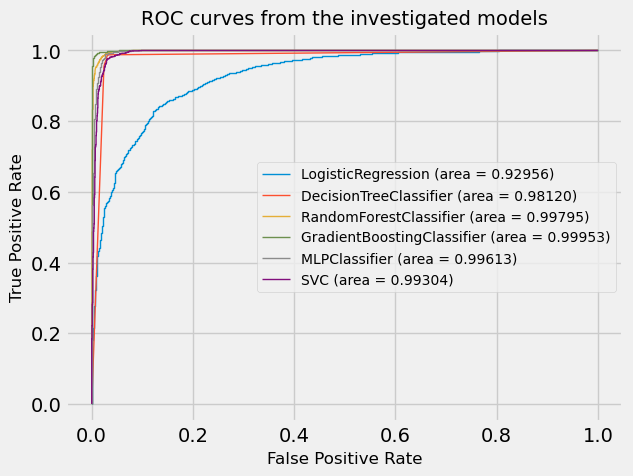

In [47]:
for name, model in best_models.items():
  roc_analysis(model, X_test, y_test)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC curves from the investigated models', fontsize=14)
plt.legend(fontsize = 10, loc = 'right')
plt.show()

## **Multilabel Classification**

In [48]:
df_clean = df[df.RNF != 1]

In [49]:
df_failures = df_clean.loc[df_clean[label_binary[0]] == 1]

In [50]:
X_multilabel = df_failures[num+cat]
y_multilabel = df_failures[label_multi[:4]]

In [51]:
y_multilabel.value_counts()

TWF  HDF  PWF  OSF
0    1    0    0      106
     0    1    0       80
          0    1       78
1    0    0    0       42
0    0    1    1       11
     1    0    1        6
          1    0        3
1    0    0    1        2
          1    1        1
dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multilabel, y_multilabel, test_size=0.2, random_state=100)

In [53]:
!pip install scikit-multilearn

In [54]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.pipeline import Pipeline

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

In [55]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skmultilearn.model_selection import IterativeStratification

In [56]:
# define models
base_models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network MLP': MLPClassifier()
}

result = pd.DataFrame(columns=['Model', 'Base Model', 'Score'])
k_fold = IterativeStratification(n_splits=5, order=1)

for base_name, base_model in base_models.items():
  models = {
      'Binary Relevance': BinaryRelevance(base_model),
      'Classifier Chain': ClassifierChain(base_model),
      'Label Powerset': LabelPowerset(base_model)
  }
  for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = cross_val_score(model, X_train, y_train, cv=k_fold).mean()
    result = result.append({'Model': name, 'Base Model': base_name, 'Score': score},
                           ignore_index = True)

result.sort_values('Score', ascending = False).reset_index(drop = True)

,Model,Base Model,Score
0,Label Powerset,Logistic Regression,0.882045
1,Label Powerset,Neural Network MLP,0.881792
2,Label Powerset,SVM,0.881464
3,Label Powerset,Random Forest,0.881003
4,Classifier Chain,Random Forest,0.870934
5,Binary Relevance,Random Forest,0.870917
6,Classifier Chain,Neural Network MLP,0.866926
7,Classifier Chain,SVM,0.865229
8,Classifier Chain,Logistic Regression,0.855619
9,Label Powerset,Gradient Boosting,0.851653


In [57]:
def eval(model, param_grid, X_train, y_train):
  labels = list(y_train.columns.values)
  grid_search = GridSearchCV(model, param_grid, scoring = 'accuracy', cv = k_fold)

  grid_search.fit(X_train, y_train)
  best_model = grid_search.best_estimator_
  print('Best Parameters:', grid_search.best_params_)

  y_pred = best_model.predict(X_test)

  # Calculate accuracy
  accuracy = grid_search.best_score_
  print('Accuracy:', accuracy)

  # Calculate Hamming Loss
  hamming_loss_val = hamming_loss(y_test, y_pred)
  print('Hamming Loss:', hamming_loss_val)

  # Classification report
  print('Classification Report:')
  print(classification_report(y_test, y_pred, digits = 4))

  #Confusion Matrix
  cm = multilabel_confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(len(labels)*7,len(labels)))
  for idx,i in enumerate(labels):
    plt.subplot(1,len(labels),idx+1)
    sns.heatmap(cm[idx], annot=True, cmap = 'Blues',
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual',fontsize=10)
    plt.xlabel('Predicted',fontsize=10)
    plt.title('Confusion Matrix of '+i, fontsize=12)

Best Parameters: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
Accuracy: 0.9045916060344472
Hamming Loss: 0.01893939393939394
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         9
           1     1.0000    0.9167    0.9565        24
           2     1.0000    0.8750    0.9333        24
           3     1.0000    1.0000    1.0000        16

   micro avg     1.0000    0.9315    0.9645        73
   macro avg     1.0000    0.9479    0.9725        73
weighted avg     1.0000    0.9315    0.9638        73
 samples avg     1.0000    0.9621    0.9747        73



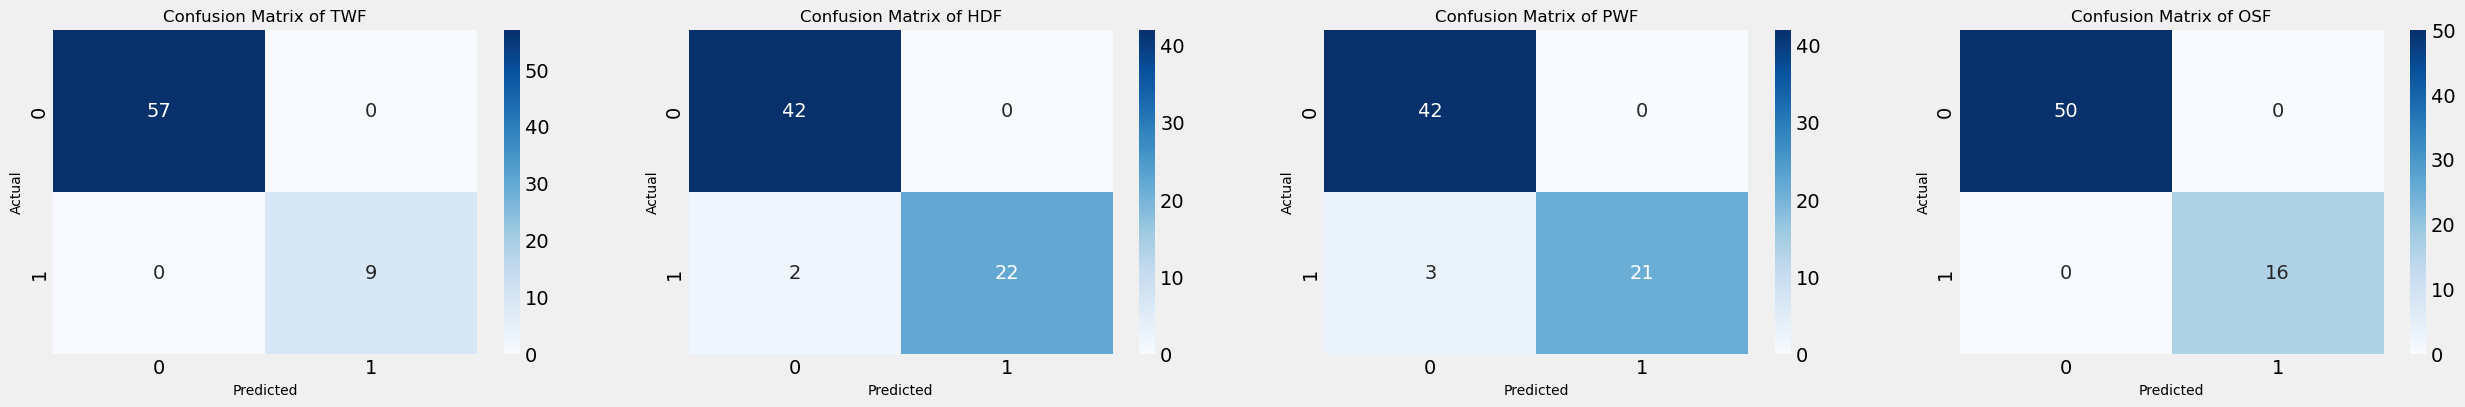

In [58]:
model = LabelPowerset(LogisticRegression())

param_grid = {
    'classifier__C': [0.1, 1, 10],  
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag'],
    'classifier__class_weight': ['balanced', None]
}

eval(model, param_grid, X_train, y_train)

Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 40}
Accuracy: 0.8931877751877753
Hamming Loss: 0.03409090909090909
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         9
           1     1.0000    0.8750    0.9333        24
           2     0.9524    0.8333    0.8889        24
           3     1.0000    0.9375    0.9677        16

   micro avg     0.9848    0.8904    0.9353        73
   macro avg     0.9881    0.9115    0.9475        73
weighted avg     0.9843    0.8904    0.9345        73
 samples avg     0.9848    0.9318    0.9495        73



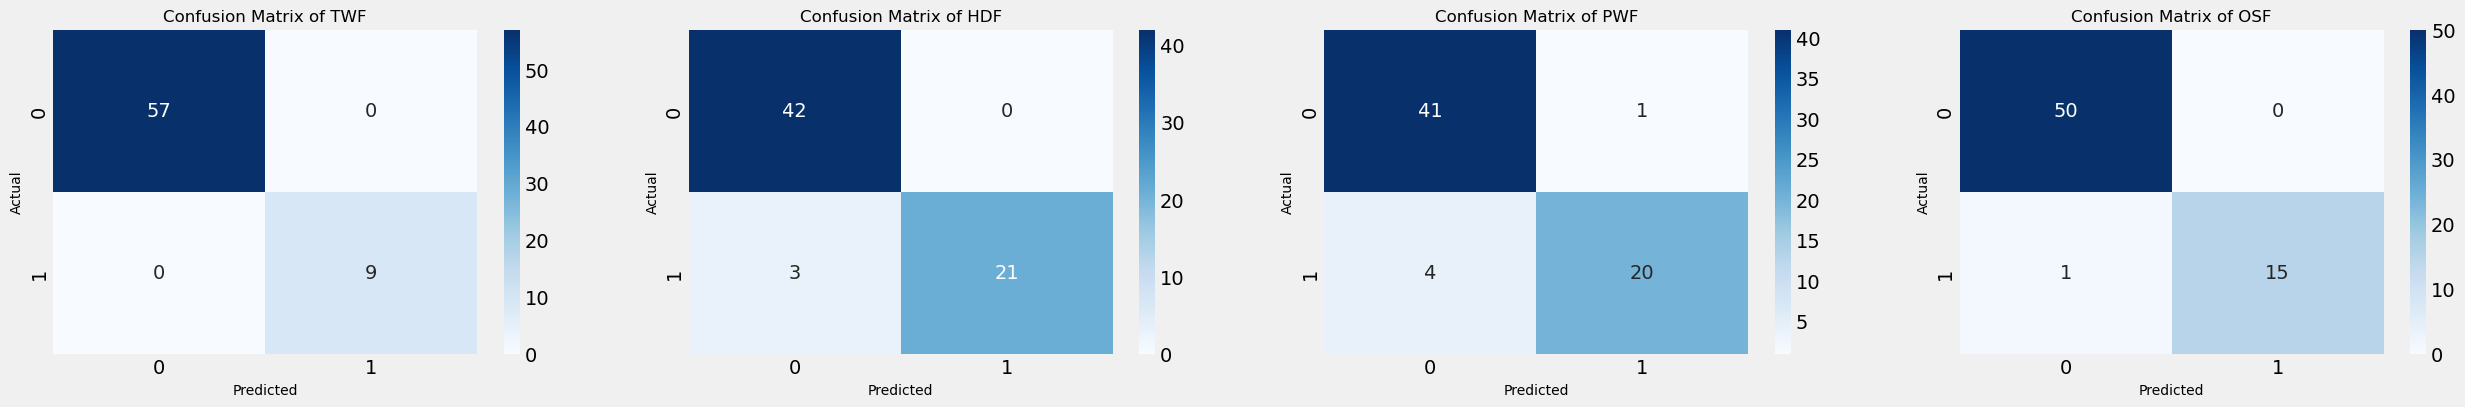

In [59]:
model = LabelPowerset(RandomForestClassifier())

param_grid = {
    'classifier__n_estimators': [20, 30, 40],
    'classifier__max_depth': [10, 15, 20],
    'classifier__min_samples_split': [5, 10, 15]
}

eval(model, param_grid, X_train, y_train)

Best Parameters: {'classifier__max_depth': 30, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 30}
Accuracy: 0.8800554724280136
Hamming Loss: 0.045454545454545456
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.7778    0.8750         9
           1     1.0000    0.9167    0.9565        24
           2     0.9091    0.8333    0.8696        24
           3     1.0000    0.8750    0.9333        16

   micro avg     0.9692    0.8630    0.9130        73
   macro avg     0.9773    0.8507    0.9086        73
weighted avg     0.9701    0.8630    0.9128        73
 samples avg     0.9394    0.8939    0.9091        73



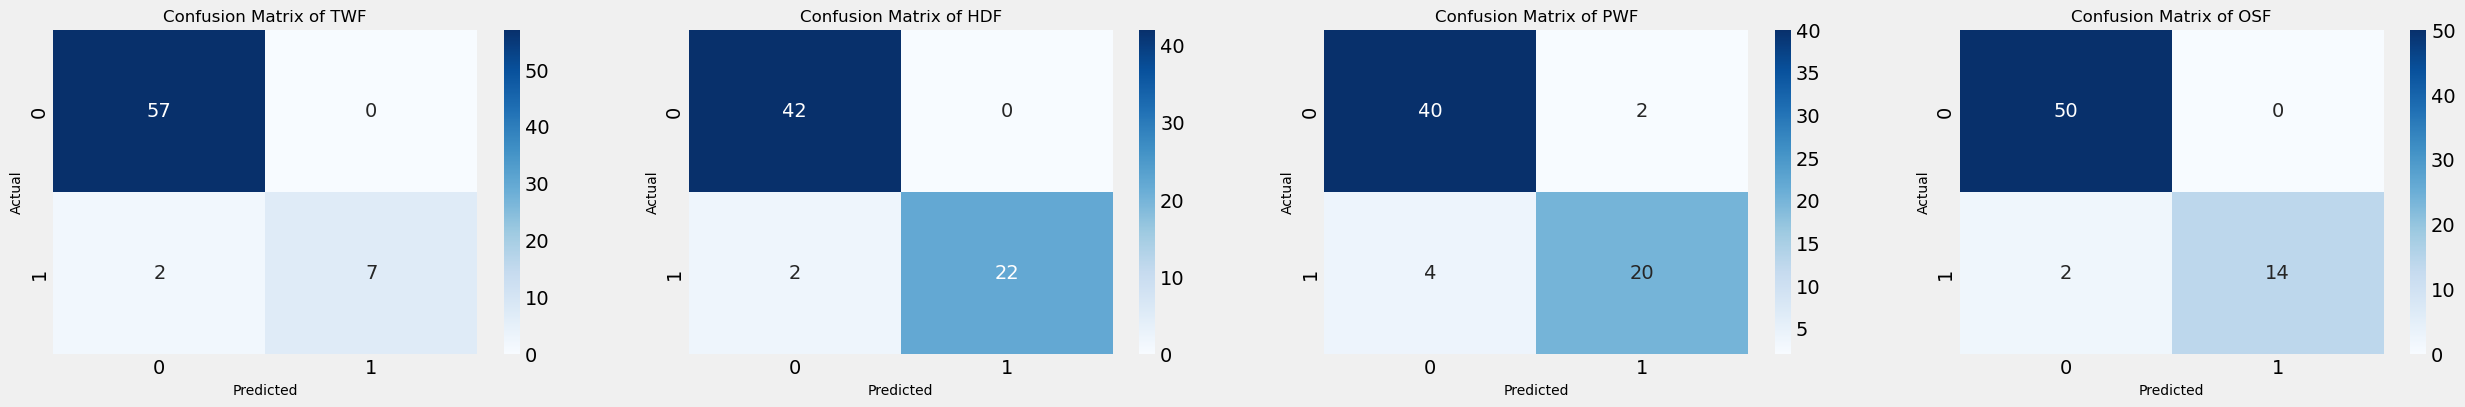

In [60]:
model = ClassifierChain(RandomForestClassifier())

param_grid = {
    'classifier__n_estimators': [30, 60, 120],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [10, 15, 20]
}

eval(model, param_grid, X_train, y_train)